This block contains comments as markdown code
# **Chapter 1**  
**ATMOS 5340: Environmental Programming and Statistics**  
**John Horel **

- Follow  these directions for doing these steps using a linux terminal window
- are you in your atmos_5340/chapter1 directory?
- check the directory you are in: pwd
- If not in that directory, then type: cd 
- And then type: cd atmos_5340/chapter1
- Type the following (Note the dot after the space): cp ~u0035056/atmos_5340_2022/chapter1/* . 
- Have you already copied the data directory? If not, you'll need to do that too. Review the instructions for that



# Using Python modules

`numpy` provides routines to handle arrays and many calculations efficiently and is imported by convention as `np`. Numpy functions are very good at handling homogeneous data arrays (and similar in that respect to matlab functions).

`pandas` is really good at handling tabular/array data that may have heterogeneous types (floating and text, for example). It is imported by convention as `pd`. 

There are a couple sets of panda library routines  (`Series`, and `DataFrame`) used so frequently that we'll import those directly too.

`scipy` has a bunch of statistical functions and we'll import `stats` from `scipy`


`pyplot` is a _submodule_ of matplotlib. It is typically imported as the alias `plt` to handle basic plotting

In [26]:
# these are python modules used in the program
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

Alta snowfall
https://utahavalanchecenter.org/alta-monthly-snowfall


Look in the `data` folder at the called `alta_snow.csv`

Open the `alta_snow.csv` file see the column contents and the units.

- The 0th column is the Year at Season End
- The 1st-6th column are the total snowfall in each month from November to April (in inches)
- The 7th column is the Nov-Apr total snowfall (inches)

Begins in the 1946 season and ends in 2022

In [27]:
#read the year of the Alta snowfall data
year = np.genfromtxt('../data/alta_snow.csv', delimiter=',',usecols=0,skip_header = 1)
print(year)
#read the seasonal total and convert from inches to cm
snow = np.genfromtxt('../data/alta_snow.csv', delimiter=',', usecols=7, skip_header=1)
#print out the data after converting it to cm
print(snow)
#what are the min and max values?
print("Min: %.1f Max: %.1f Mean: %.1f" % (np.min(snow),np.max(snow),np.mean(snow)))
snow_per = 100.* (snow)/np.mean(snow)

[1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957.
 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017.
 2018. 2019. 2020. 2021. 2022.]
[451.  374.  549.  523.  477.  349.  641.  411.  383.  472.  460.  386.
 559.5 386.  395.5 326.  401.5 401.  566.  573.  433.  544.  479.5 566.1
 459.  481.5 466.6 496.5 595.6 605.  439.5 314.5 524.5 488.  514.  391.
 696.  637.  743.5 457.  599.  381.8 410.3 581.5 448.  580.2 395.  650.4
 490.3 745.4 562.  599.1 574.9 458.4 446.  469.7 567.7 399.4 570.8 553.6
 633.5 356.  654.  578.  430.  553.  329.5 382.5 357.5 267.5 393.  530.5
 288.  475.  416.  374.  282.4]
Min: 267.5 Max: 745.4 Mean: 483.1


In [28]:
val_2023 = 1.7*483.1
print(val_2023)
year=np.append(year,2023)
snow_per=np.append(snow_per,159.)

821.27


In [29]:
#use pandas module to organize the data in a convenient manner
#by default the pandas display format shows up to 5 places to the right of the decimal point, limit it to 1
#this next line is really obtuse, so don't stress over what it means
pd.set_option('display.float_format', lambda x: '%.1f' % x)
#define a dataframe, df, from the snow organized by year
df = pd.DataFrame(snow_per, index=year.astype(int),columns=['Alta Snow (%)'])
#list out the content of the dataframe
df

Alta Snow (%)
1946           93.4
1947           77.4
1948          113.6
1949          108.3
1950           98.7
...             ...
2019           98.3
2020           86.1
2021           77.4
2022           58.5
2023          159.0

[78 rows x 1 columns]

In [30]:

below = df[df['Alta Snow (%)']<100]
above = df[df['Alta Snow (%)']>=100]


In [31]:
below

Alta Snow (%)
1946           93.4
1947           77.4
1950           98.7
1951           72.2
1953           85.1
1954           79.3
1955           97.7
1956           95.2
1957           79.9
1959           79.9
1960           81.9
1961           67.5
1962           83.1
1963           83.0
1966           89.6
1968           99.3
1970           95.0
1971           99.7
1972           96.6
1976           91.0
1977           65.1
1981           80.9
1985           94.6
1987           79.0
1988           84.9
1990           92.7
1992           81.8
1999           94.9
2000           92.3
2001           97.2
2003           82.7
2007           73.7
2010           89.0
2012           68.2
2013           79.2
2014           74.0
2015           55.4
2016           81.3
2018           59.6
2019           98.3
2020           86.1
2021           77.4
2022           58.5

In [32]:
above

Alta Snow (%)
1948          113.6
1949          108.3
1952          132.7
1958          115.8
1964          117.2
1965          118.6
1967          112.6
1969          117.2
1973          102.8
1974          123.3
1975          125.2
1978          108.6
1979          101.0
1980          106.4
1982          144.1
1983          131.9
1984          153.9
1986          124.0
1989          120.4
1991          120.1
1993          134.6
1994          101.5
1995          154.3
1996          116.3
1997          124.0
1998          119.0
2002          117.5
2004          118.1
2005          114.6
2006          131.1
2008          135.4
2009          119.6
2011          114.5
2017          109.8
2023          159.0

In [33]:
# Colours - Choose the extreme colours of the colour map
colors_low = ["#c81d25","#ffacaf"] # Extreme colours of the low scale
colors_high = ["#bbdefb","#2196f3"] # Extreme colours of the high scale

# Colormap - Build the colour maps
cmap_low = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_low, N=256)
cmap_high = mpl.colors.LinearSegmentedColormap.from_list("high_map", colors_high, N=256)
norm_low = mpl.colors.Normalize(below.min(), 100.) # linearly normalizes data into the [0.0, 1.0] interval
norm_high = mpl.colors.Normalize(100., above.max())
norm_low

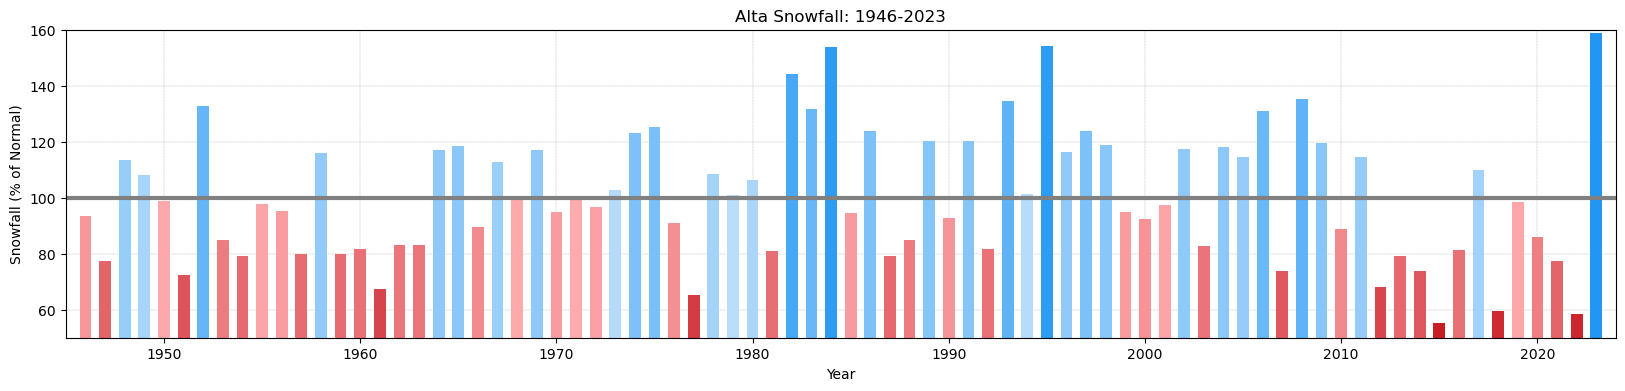

In [34]:
#create a fig of Alta snowfall time series
fig,(ax1) = plt.subplots(1,1,figsize=(20,4))
# Plot bars and average (horizontal) line
bar1 = ax1.bar(below.index, below['Alta Snow (%)'], color=cmap_low(norm_low(below['Alta Snow (%)'])), width=0.6, label='Below Average', zorder=2)
bar2 = ax1.bar(above.index, above['Alta Snow (%)'], color=cmap_high(norm_high(above['Alta Snow (%)'])), width=0.6, label='Above Average', zorder=2)
plt.axhline(y=100., color = 'grey', linewidth=3)

decade_ticks = np.arange(1950,2030,10)

ax1.set(xlim=(1945,2024),ylim=(50.,160.))
ax1.set(xlabel="Year",ylabel="Snowfall (% of Normal)")
ax1.set(xticks=decade_ticks)
ax1.set(title="Alta Snowfall: 1946-2023")
#add grids to the plot
ax1.grid(linestyle='--', color='grey', linewidth=.2)

#save the figure to 
plt.savefig('alta_per.png')

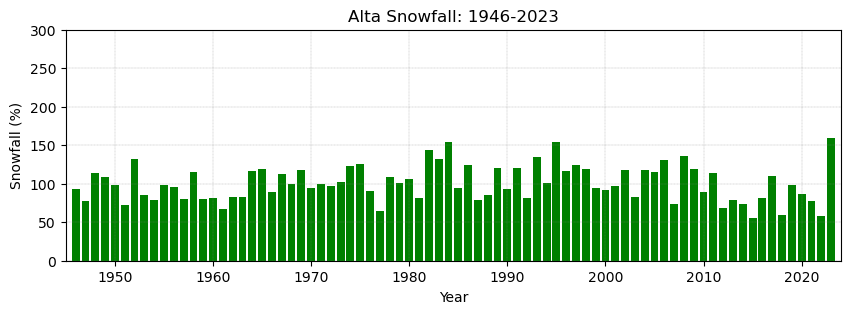

In [35]:
#Creat5e bar plot time series of Alta seasonal snowfall
#create a list for the times for tick marks on the x axis. This will stop at 2020 (not 2030)
decade_ticks = np.arange(1950,2030,10)

#create a fig of Alta snowfall time series
fig,(ax1) = plt.subplots(1,1,figsize=(10,3))
ax1.bar(year,snow_per,color='green')
ax1.set(xlim=(1945,2024),ylim=(0.,300.))
ax1.set(xlabel="Year",ylabel="Snowfall (%)")
ax1.set(xticks=decade_ticks)
ax1.set(title="Alta Snowfall: 1946-2023")
#add grids to the plot
ax1.grid(linestyle='--', color='grey', linewidth=.2)

#save the figure to 
plt.savefig('alta_snowfall.png')

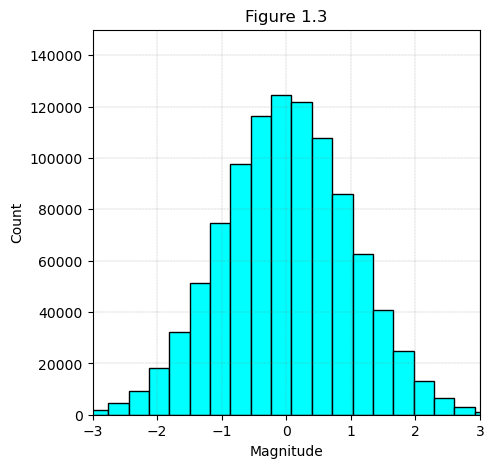

In [36]:
#generate a Gaussian type empirical distribution for figure 1.3
from numpy.random import normal
sample = normal(loc=0, scale=1, size=1000000)
# plot the histogram
fig,(ax1) = plt.subplots(1,1,figsize=(5,5))
ax1.hist(sample, bins=31, color='cyan',edgecolor='black',linewidth=1,align='mid')
ax1.set(xlim=(-3,3),ylim=(0,150000))
ax1.set(xlabel="Magnitude",ylabel="Count")
ax1.set(title="Figure 1.3")
#add grids to the plot
ax1.grid(linestyle='--', color='grey', linewidth=.2)
#save the figure to 
plt.savefig('figure_1.3.png')
